<a href="https://colab.research.google.com/github/lrsilsbee/Machine-Learning/blob/main/Lauren_Silsbee_data_exploration_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

performance_df = pd.read_sql_query('select * from studentsperformance',con=engine)
engine.dispose()



In [ ]:
#Handle the missing values:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
            "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()


education_df.dropna(inplace=True)
education_df.isnull().any()


PRIMARY_KEY                     False
STATE                           False
YEAR                            False
ENROLL                          False
TOTAL_REVENUE                   False
FEDERAL_REVENUE                 False
STATE_REVENUE                   False
LOCAL_REVENUE                   False
TOTAL_EXPENDITURE               False
INSTRUCTION_EXPENDITURE         False
SUPPORT_SERVICES_EXPENDITURE    False
OTHER_EXPENDITURE               False
CAPITAL_OUTLAY_EXPENDITURE      False
GRADES_PK_G                     False
GRADES_KG_G                     False
GRADES_4_G                      False
GRADES_8_G                      False
GRADES_12_G                     False
GRADES_1_8_G                    False
GRADES_9_12_G                   False
GRADES_ALL_G                    False
AVG_MATH_4_SCORE                False
AVG_MATH_8_SCORE                False
AVG_READING_4_SCORE             False
AVG_READING_8_SCORE             False
dtype: bool

Question 1: Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [ ]:
print(education_df.describe())

print('Reading scores are lower than math scores, but maybe these are on different scales.')
print('More funding comes from the federal government.')


              YEAR        ENROLL  ...  AVG_READING_4_SCORE  AVG_READING_8_SCORE
count   466.000000  4.660000e+02  ...           466.000000           466.000000
mean   2008.577253  9.442125e+05  ...           219.508638           263.789943
std       5.779779  1.122051e+06  ...             7.426546             6.875627
min    1996.000000  4.417900e+04  ...           181.626990           236.379102
25%    2005.000000  2.794832e+05  ...           215.338956           259.661771
50%    2009.000000  6.639415e+05  ...           221.130461           265.217081
75%    2013.000000  1.018588e+06  ...           224.531280           268.307884
max    2017.000000  6.307022e+06  ...           236.773867           280.499130

[8 rows x 23 columns]
Reading scores are lower than math scores, but maybe these are on different scales.
More funding comes from the federal government.


Question 2: Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

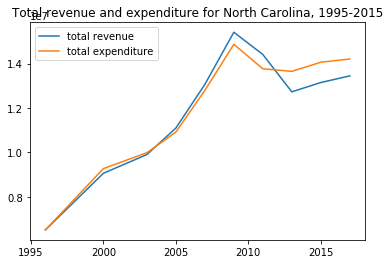

Both revenue and expenditure increased fairly drastically from 1995 to 2009, then decreased until 2013, and slightly increased again.


In [ ]:
#Look at NC's total rev and total exp through the years

plt.plot(education_df.loc[education_df.STATE == "NORTH_CAROLINA", "YEAR"],
        education_df.loc[education_df.STATE == "NORTH_CAROLINA", "TOTAL_REVENUE"], label="total revenue")

plt.plot(education_df.loc[education_df.STATE == "NORTH_CAROLINA", "YEAR"],
         education_df.loc[education_df.STATE == "NORTH_CAROLINA", "TOTAL_EXPENDITURE"], label="total expenditure")

plt.title('Total revenue and expenditure for North Carolina, 1995-2015')
plt.legend()
plt.show()
print('Both revenue and expenditure increased fairly drastically from 1995 to 2009, then decreased until 2013, and slightly increased again.')


Question 3: In your chosen state, which of the lessons are the students more successful, math or reading?

NC 4th graders score higher in math, on average
Except for in 1966, NC 8th graders score higher in math, on average


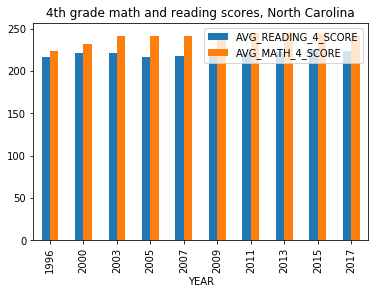

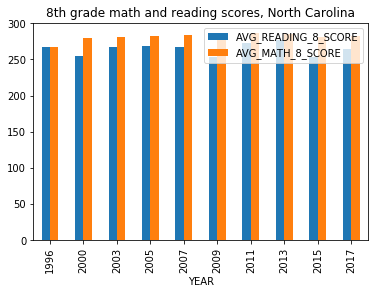

In [ ]:
#compare reading and math scores for students just in NC

NC_df = education_df[education_df['STATE'] =='NORTH_CAROLINA']

#df.plot(x="X", y=["A", "B", "C"], kind="bar")
NC_df.plot(x = 'YEAR', y = ['AVG_READING_4_SCORE', 'AVG_MATH_4_SCORE'], kind ='bar')
plt.title("4th grade math and reading scores, North Carolina")
plt.show
print('NC 4th graders score higher in math, on average')

#8th grade:

NC_df.plot(x = 'YEAR', y = ['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE'], kind ='bar')
plt.title("8th grade math and reading scores, North Carolina")
plt.show
print('Except for in 1966, NC 8th graders score higher in math, on average')

Question 4: What are the distributions of the math and reading scores in the sample?

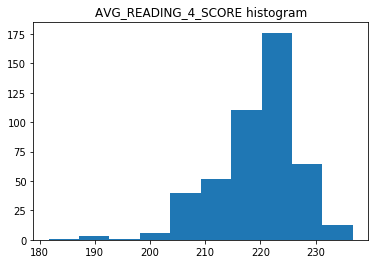

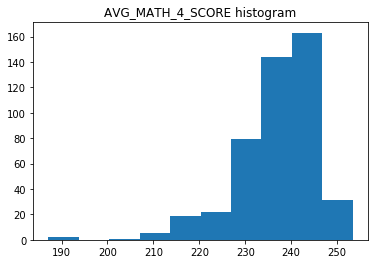

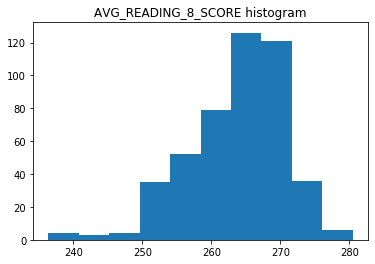

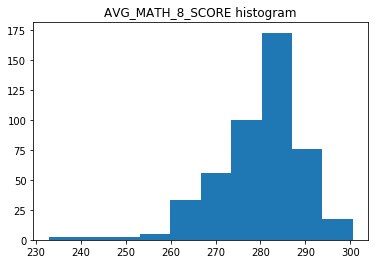

They all have bell curves but they are skewed. Maybe we should take the logs to get them closer to normal.


In [ ]:
#look at math and reading for 4 and 8

plt.hist(education_df.AVG_READING_4_SCORE)
plt.title("AVG_READING_4_SCORE histogram")
plt.show()

plt.hist(education_df.AVG_MATH_4_SCORE)
plt.title("AVG_MATH_4_SCORE histogram")
plt.show()

plt.hist(education_df.AVG_READING_8_SCORE)
plt.title("AVG_READING_8_SCORE histogram")
plt.show()

plt.hist(education_df.AVG_MATH_8_SCORE)
plt.title("AVG_MATH_8_SCORE histogram")
plt.show()
print('They all have bell curves but they are skewed. Maybe we should take the logs to get them closer to normal.')

Question 5: Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [ ]:
print(education_df['AVG_MATH_4_SCORE'].isnull().any())
print(education_df['AVG_MATH_8_SCORE'].isnull().any())
print(education_df['AVG_READING_4_SCORE'].isnull().any())
print(education_df['AVG_READING_4_SCORE'].isnull().any())

#I do not actually have any missing values, but I could hypothetically fill them in like this (repeating for all 4 variables):

# with the mean:

#education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean())

# with the median:

# education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median())

# using linear interpolation:

#education_df.AVG_MATH_4_SCORE.interpolate())

False
False
False
False
